(20640, 8)
(20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
        0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127    1.02381       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137    0.97188      2401.0  2.109842     37.86   

   Longitude  
0    -122.23  
1    -122.22  
(20640,)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127    1.02381       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   

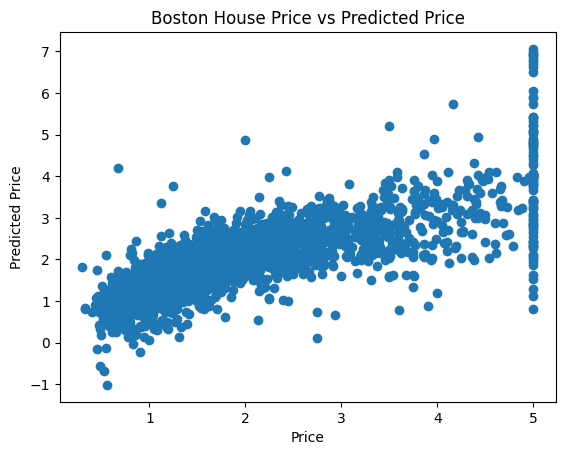

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn import datasets 
from sklearn import metrics 
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()
print(boston.data.shape) 
print(boston.target.shape) 
print(boston.feature_names) 
df = pd.DataFrame(boston.data) 
print(df.head()) 
df.columns = boston.feature_names 
print(df.head(2)) 
print(boston.target.shape) 
df['PRICE'] = boston.target 
print(df.head(2)) 
df.describe() 
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, 
test_size=0.10, random_state=42) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)
model = LinearRegression() 
model.fit(X_train, y_train)
print(model.coef_) 
print('Intercept: %.3f' % model.intercept_)
y_pred = model.predict(X_test) 
print(y_pred[:5])  #first 5 predictions 
print(y_test[:5]) #first 5 target values 
plt.scatter(y_test, y_pred) 
plt.xlabel('Price') 
plt.ylabel('Predicted Price') 
plt.title('Boston House Price vs Predicted Price') 
print('R-squared value on training dataset: %0.3f' %model.score(X_train, y_train)) 
print('R-squared value on training dataset: %0.3f' %model.score(X_test, y_test)) 
print('Mean Absolute Error: %0.3f' %metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error: %0.3f' %metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error: %0.3f' %np.sqrt(metrics.mean_squared_error(y_test, 
y_pred))) 
mean = np.mean(y_test) 
print('10% of Mean value of target: {:0.3f}'.format(np.mean(y_test)*0.1)) 

Data shape: (20640, 8)
Target shape: (20640,)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127    1.02381       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137    0.97188      2401.0  2.109842     37.86   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.00

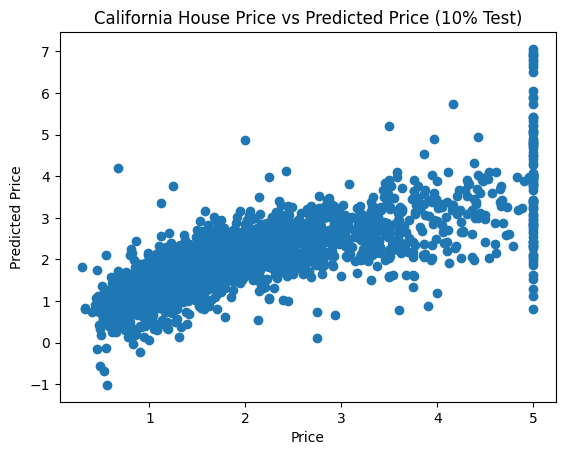

Original Linear Regression (10% Test)
R-squared on train: 0.609011022000564
R-squared on test: 0.5808353312067701
Mean Absolute Error: 0.5423972782283999
Mean Squared Error: 0.5590019245025623
Root Mean Squared Error: 0.7476643127116355


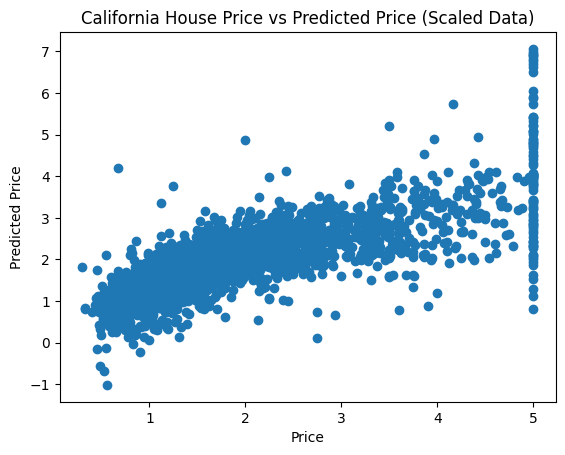


Linear Regression with Scaled Data (10% Test)
R-squared on train: 0.6090110220005639
R-squared on test: 0.5808353312067694
Mean Absolute Error: 0.5423972782283895
Mean Squared Error: 0.5590019245025631
Root Mean Squared Error: 0.747664312711636


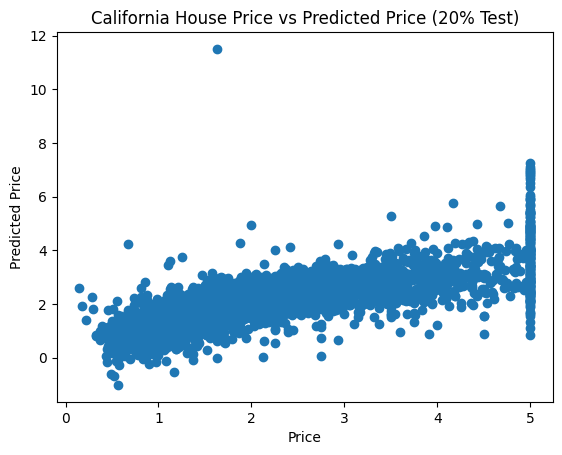


Linear Regression (20% Test)
R-squared on train: 0.6125511913966952
R-squared on test: 0.5757877060324521
Mean Absolute Error: 0.5332001304956989
Mean Squared Error: 0.5558915986952425
Root Mean Squared Error: 0.7455813830127751

MSE change from 10% test to 20% test: -0.003110325807319736


In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
boston = fetch_california_housing()
print("Data shape:", boston.data.shape)
print("Target shape:", boston.target.shape)
print("Feature names:", boston.feature_names)

# Create DataFrame
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
print(df.head(2))
print(df.describe())

# ------------------------------
# Original Linear Regression (Test size = 10%)
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.10, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('California House Price vs Predicted Price (10% Test)')
plt.show()

# Metrics
print("Original Linear Regression (10% Test)")
print("R-squared on train:", model.score(X_train, y_train))
print("R-squared on test:", model.score(X_test, y_test))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# ------------------------------
# Extra Credit 1: Normalize Data using StandardScaler
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(boston.data)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled, boston.target, test_size=0.10, random_state=42
)

model_scaled = LinearRegression()
model_scaled.fit(X_train_s, y_train_s)
y_pred_s = model_scaled.predict(X_test_s)

# Scatter plot for scaled data
plt.scatter(y_test_s, y_pred_s)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('California House Price vs Predicted Price (Scaled Data)')
plt.show()

# Metrics for scaled data
print("\nLinear Regression with Scaled Data (10% Test)")
print("R-squared on train:", model_scaled.score(X_train_s, y_train_s))
print("R-squared on test:", model_scaled.score(X_test_s, y_test_s))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test_s, y_pred_s))
print("Mean Squared Error:", metrics.mean_squared_error(y_test_s, y_pred_s))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test_s, y_pred_s)))

# ------------------------------
# Extra Credit 2: Change test size to 20%
# ------------------------------
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(
    boston.data, boston.target, test_size=0.20, random_state=42
)
model_20 = LinearRegression()
model_20.fit(X_train_20, y_train_20)
y_pred_20 = model_20.predict(X_test_20)

# Scatter plot for 20% test
plt.scatter(y_test_20, y_pred_20)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('California House Price vs Predicted Price (20% Test)')
plt.show()

# Metrics for 20% test
print("\nLinear Regression (20% Test)")
print("R-squared on train:", model_20.score(X_train_20, y_train_20))
print("R-squared on test:", model_20.score(X_test_20, y_test_20))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test_20, y_pred_20))
print("Mean Squared Error:", metrics.mean_squared_error(y_test_20, y_pred_20))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test_20, y_pred_20)))

# Check whether error values reduced
original_mse = metrics.mean_squared_error(y_test, y_pred)
new_mse = metrics.mean_squared_error(y_test_20, y_pred_20)
print("\nMSE change from 10% test to 20% test:", new_mse - original_mse)
